In [45]:
import sklearn
import pandas as pd
import matplotlib as plt
import seaborn as sns
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Kirilll\AppData\Roaming\Python\Python38\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [6]:
data=pd.read_csv('D:\\DDDrilll\\ds3-spring-2018\\2. Basic Algorithms\\2.4 Accuracy_regularization\\adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [54]:
data['relationship'].value_counts(normalize=True)

Husband           0.403669
Not-in-family     0.257627
Own-child         0.155215
Unmarried         0.104930
Wife              0.047725
Other-relative    0.030834
Name: relationship, dtype: float64

<AxesSubplot: >

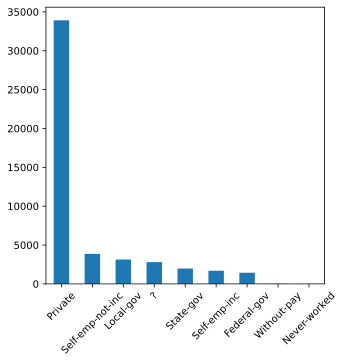

In [49]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)

data.workclass.value_counts().plot(kind='bar', rot=45)


<AxesSubplot: >

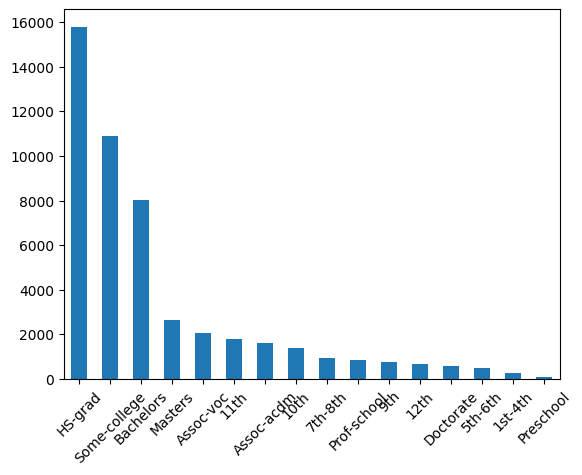

In [42]:
data.education.value_counts().plot(kind='bar', rot=45)


<AxesSubplot: >

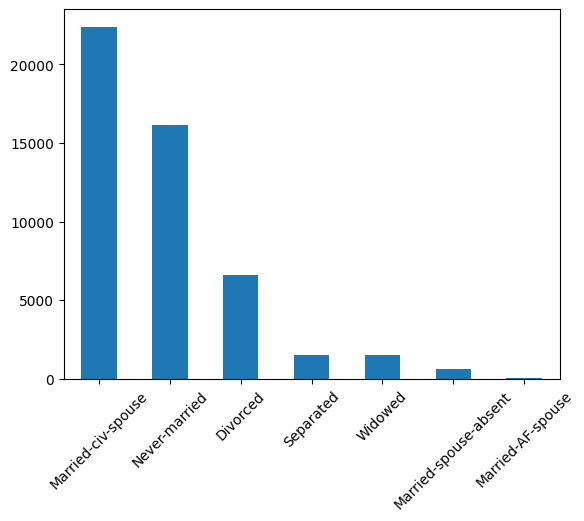

In [43]:
data['marital-status'].value_counts().plot(kind='bar', rot=45)


<AxesSubplot: >

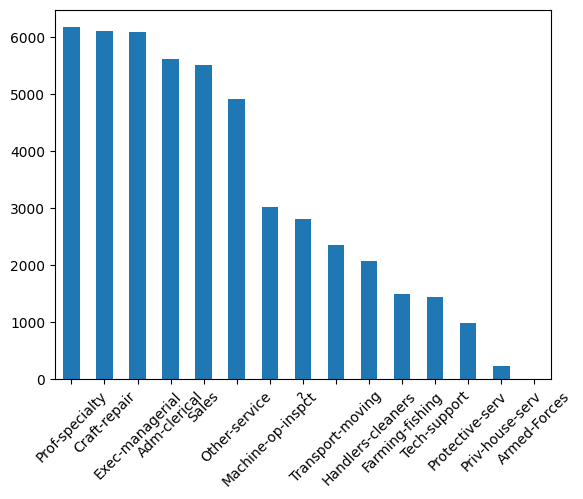

In [44]:
data.occupation.value_counts().plot(kind='bar', rot=45)


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [62]:
y=data['income']
le.fit(y)
y=pd.Series(le.transform( y ))


In [74]:
x=pd.get_dummies(data=data,columns=['marital-status','gender','education','relationship'])
x=x.drop(['income','workclass','educational-num','race','capital-gain','capital-loss','hours-per-week','native-country','fnlwgt','age','occupation'],axis=1)

In [75]:
x.head()

,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,gender_Female,gender_Male,education_10th,...,education_Masters,education_Preschool,education_Prof-school,education_Some-college,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [78]:
x_train, x_test, y_train, x_test=(train_test_split(x, y, test_size = 0.2, random_state = 0))

сделаем для логистической регресии

In [79]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8221278120441226